**Libraries**

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score
from keras import callbacks
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
alex = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Alex')
kelly = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Kelly')
hunter = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Hunter')
test = pd.read_excel('data/lab6_train_data.xlsx', sheet_name='Test')

In [34]:
import os
import glob
from PIL import Image
import numpy as np
import pandas as pd

def load_and_flatten_images(root_dir,
                            exts=(".jpg", ".jpeg", ".png", ".bmp"),
                            target_size=(64, 64)):
    """
    Walks through `root_dir`, finds all image files, resizes, flattens,
    and returns a DataFrame with:
        - 'Image ID': the filename (no path)
        - pixel_0 ... pixel_n: flattened RGB pixel values
    """
    all_files = []
    for ext in exts:
        all_files.extend(glob.glob(os.path.join(root_dir, f"**/*{ext}"), recursive=True))

    rows = []
    for fp in all_files:
        try:
            img = Image.open(fp).convert("RGB")
        except Exception as e:
            print(f"✗ Could not open {fp}: {e}")
            continue

        if target_size is not None:
            img = img.resize(target_size, resample=Image.BILINEAR)

        arr = np.array(img) / 255.0
        flat = arr.reshape(-1)

        # Use cross-platform safe basename for the image file
        basename = os.path.basename(fp)
        row = [basename] + flat.tolist()
        rows.append(row)

    if not rows:
        return pd.DataFrame()

    num_pixels = target_size[0] * target_size[1] * 3
    col_names = ["Image ID"] + [f"pixel_{i}" for i in range(num_pixels)]
    df = pd.DataFrame(rows, columns=col_names)
    return df


In [35]:
#Alex Images
folder_path = "Alex_Kelly_Pics/Alex"
alex_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(alex_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(alex_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(alex_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = alex_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = alex_images["Image ID"].tolist()

(256, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Alex-Image01.png
pixel_0             0.576471
pixel_1              0.52549
pixel_2             0.541176
pixel_3             0.584314
pixel_4             0.529412
pixel_5             0.541176
pixel_6             0.572549
pixel_7              0.52549
pixel_8             0.537255
Name: 0, dtype: object


In [37]:
#Kelly Images
folder_path = "Alex_Kelly_Pics/Kelly"
kelly_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(kelly_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(kelly_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(kelly_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = kelly_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = kelly_images["Image ID"].tolist()

(229, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Kelly-Image01.png
pixel_0              0.352941
pixel_1                   0.2
pixel_2              0.160784
pixel_3              0.352941
pixel_4              0.203922
pixel_5              0.164706
pixel_6              0.356863
pixel_7              0.203922
pixel_8              0.156863
Name: 0, dtype: object


In [38]:
#Hunter Images
folder_path = "Alex_Kelly_Pics/Hunter"
hunter_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(hunter_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(hunter_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(hunter_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = hunter_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = hunter_images["Image ID"].tolist()

(7, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    Hunter-Image01.png
pixel_0               0.168627
pixel_1               0.196078
pixel_2                0.25098
pixel_3               0.207843
pixel_4               0.227451
pixel_5               0.266667
pixel_6                0.27451
pixel_7               0.286275
pixel_8               0.301961
Name: 0, dtype: object


In [39]:
#TestSet Images
folder_path = "Alex_Kelly_Pics/TestSet"
test_images = load_and_flatten_images(folder_path, target_size=(64, 64))
print(test_images.shape)         # e.g., (N_images, 1 + 224*224*3)
print(test_images.columns[:5])  # ['filename', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']
print(test_images.iloc[0, :10]) # show first image's name + first few pixel values

# If you really need a NumPy array for “everything but the filename”:
X = test_images.drop(columns=["Image ID"]).to_numpy()   # shape = (N_images, 224*224*3)
filenames = test_images["Image ID"].tolist()

(20, 12289)
Index(['Image ID', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3'], dtype='object')
Image ID    TestSetImage01.png
pixel_0               0.364706
pixel_1               0.345098
pixel_2               0.298039
pixel_3               0.231373
pixel_4               0.227451
pixel_5               0.219608
pixel_6               0.243137
pixel_7               0.247059
pixel_8               0.270588
Name: 0, dtype: object


In [241]:
#combine into single image
#df["filename"].str.removesuffix(".png")


In [40]:
#stack cat df
train = pd.concat([alex, kelly, hunter], ignore_index=True)

#stack images df
train_images = pd.concat([alex_images, kelly_images, hunter_images], ignore_index=True)

#remove .png to merge datasets
train_images["Image ID"] = train_images["Image ID"].str.removesuffix(".png")
test_images["Image ID"] = test_images["Image ID"].str.removesuffix(".png")

#merge data
train = pd.merge(train_images, train, on="Image ID")
test = pd.merge(test_images, test, on="Image ID")

**Modeling**

Approach 1: 

* Train a (convolutional) neural network to identify whether or not there is a human in the image.
* Train a (convolutional) neural network to identify whether or not there is a castle in the image.
* Train a (convolutional) neural network to identify whether the image is taken indoors or outdoors.
* Train a (convolutional) neural network to identify the landscape of the image (e.g. city, suburb, or nature/rural)
* Choose at least 10 other features (or feature categories) that you suspect might be useful for differentiating Alex and Kelly's photos, and train individual (convolutional) neural networks to identify those.

In [41]:
model = models.Sequential()

#input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))

#hidden layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

#output layer
model.add(layers.Dense(1, activation='sigmoid'))

#summarize
model.summary()

c:\Users\owenk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,574,081 (128.07 MB)

 Trainable params: 33,574,081 (128.07 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
#compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


**Train a (convolutional) neural network to identify whether or not there is a human in the image.**

In [43]:
print("train DataFrame shape:", train.shape)
print("X array shape (before reshape):", X.shape) 

train DataFrame shape: (492, 12305)
X array shape (before reshape): (20, 12288)


In [44]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Human']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)


Epoch 14: early stopping


In [46]:
human_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, human_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


0.6262626262626263

**Train a (convolutional) neural network to identify whether or not there is a castle in the image.**

In [47]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Castle']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)


Epoch 18: early stopping


In [49]:
castle_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, castle_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


0.9090909090909091

**Train a (convolutional) neural network to identify whether the image is taken indoors or outdoors.**

In [50]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Indoors or Outdoors']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)


Epoch 20: early stopping


In [52]:
indoor_outdoor_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, indoor_outdoor_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


0.8484848484848485

**Choose at least 10 other features (or feature categories) that you suspect might be useful for differentiating Alex and Kelly's photos, and train individual (convolutional) neural networks to identify those.**

**Child/Baby**

In [53]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Child/Baby']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)


Epoch 14: early stopping


In [55]:
child_baby_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, child_baby_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


0.9393939393939394

**Animal**

In [56]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Animal']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [57]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 14: early stopping


In [58]:
animal_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, animal_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


0.9292929292929293

**Cat**

In [59]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Cat']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 14: early stopping


In [61]:
cat_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, cat_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


0.98989898989899

**Dog**

In [62]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Dog']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [63]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 12: early stopping


In [64]:
dog_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, dog_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


0.9797979797979798

**Body_of_water**

In [65]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Body_of_Water']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 16: early stopping


In [67]:
body_of_water_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, body_of_water_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


0.7676767676767676

**Car**

In [68]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Car']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [69]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 13: early stopping


In [70]:
car_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, car_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


0.8888888888888888

**Bridge**

In [71]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Bridge']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 13: early stopping


In [73]:
bridge_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, bridge_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


0.9797979797979798

**Food**

In [74]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Food']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [75]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 21: early stopping


In [76]:
food_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, food_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


0.9797979797979798

**Tree**

In [77]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Tree']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [78]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 21: early stopping


In [79]:
tree_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, tree_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


0.6767676767676768

**Mountain**

In [80]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Mountain']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [81]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 18: early stopping


In [82]:
mountain_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, mountain_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


0.6868686868686869

**Instrument**

In [83]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Instrument']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 15: early stopping


In [85]:
instrument_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, instrument_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


0.98989898989899

**Drink**

In [86]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Drink']

X = X.to_numpy().reshape(-1, 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [87]:
# early call back
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

#fit model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=0
)

Epoch 23: early stopping


In [88]:
drink_pred = (model.predict(X_test) > 0.5).astype(int).ravel()

# get accuracy score
accuracy_score(y_test, drink_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


0.9797979797979798

**Train a (convolutional) neural network to identify the landscape of the image (e.g. city, suburb, or nature/rural)**

In [89]:
#variable selection
X = train.drop(columns=['Image ID', 'Human', 'Castle', 'Indoors or Outdoors', 'Landscape (City, Suburb, or Nature/Rural)', 'Child/Baby', 'Animal', 'Cat', 'Dog', 'Body_of_Water', 'Car', 'Bridge', 'Food', 'Tree', 'Mountain', 'Instrument', 'Drink'])
y = train['Landscape (City, Suburb, or Nature/Rural)']

#reshape X
X = X.to_numpy().reshape(-1, 64, 64, 3)

In [90]:
#encode y categories and one-hot encode

encoder = LabelEncoder()
y_int = encoder.fit_transform(y)

In [91]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# ─── Dummy data setup (replace this with your real X and y_int) ────────────────────────
# Suppose you already did:
#    X = ...             # shape (485, 64, 64, 3)
#    y_int = ...         # shape (485,) with values in {0,1,2}

# For the sake of demonstration, here is an example of how to generate dummy data:
# (You do NOT need to run these lines if you already have X and y_int from your preprocess.)
#
# N = 485
# X = np.random.rand(N, 64, 64, 3).astype('float32')
# y_int = np.random.randint(0, 3, size=(N,))

# ─── Split the data ─────────────────────────────────────────────────────────────────
# Make sure this matches exactly what you did before:
X_train, X_test, y_train_int, y_test_int = train_test_split(
    X, y_int, test_size=0.2, random_state=42, stratify=y_int
)

# Convert integer labels → one-hot
num_classes = 3
y_train_cat = to_categorical(y_train_int, num_classes=num_classes)
y_test_cat  = to_categorical(y_test_int,  num_classes=num_classes)

# Verify shapes
print("Shapes before model.fit:")
print("  X_train       =", X_train.shape)     # expecting (388, 64, 64, 3)
print("  y_train_cat   =", y_train_cat.shape)  # expecting (388, 3)
print("  X_test        =", X_test.shape)      # expecting ( 97, 64, 64, 3)
print("  y_test_cat    =", y_test_cat.shape)   # expecting ( 97, 3)

# ─── Build & compile the 3-class model ───────────────────────────────────────────────
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(64, 64, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ─── EarlyStopping callback ─────────────────────────────────────────────────────────
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# ─── Train the model ─────────────────────────────────────────────────────────────────
history = model.fit(
    X_train, y_train_cat,                    # must pass one-hot here
    validation_data=(X_test, y_test_cat),    # must pass one-hot here
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# If you see training progress without error, everything is correct.


Shapes before model.fit:
  X_train       = (393, 64, 64, 3)
  y_train_cat   = (393, 3)
  X_test        = (99, 64, 64, 3)
  y_test_cat    = (99, 3)


c:\Users\owenk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,574,339 (128.08 MB)

 Trainable params: 33,574,339 (128.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 817ms/step - accuracy: 0.4039 - loss: 6.7907 - val_accuracy: 0.4848 - val_loss: 1.3891
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 611ms/step - accuracy: 0.3405 - loss: 1.3284 - val_accuracy: 0.3333 - val_loss: 1.1494
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 563ms/step - accuracy: 0.4063 - loss: 1.0900 - val_accuracy: 0.4545 - val_loss: 1.0364
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 0.5243 - loss: 1.0082 - val_accuracy: 0.4747 - val_loss: 1.0272
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 626ms/step - accuracy: 0.5289 - loss: 0.9710 - val_accuracy: 0.4747 - val_loss: 1.0269
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.6016 - loss: 0.9100 - val_accuracy: 0.4949 - val_loss: 1.0563
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 680ms/step - accuracy: 0.6612 - loss: 0.8452 - val_accuracy: 0.4646 - val_loss: 1.1127
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 623ms/step - accuracy: 0.7194 - loss: 0.7139 - val_accuracy: 0.4343 - val_loss:

In [92]:
y_proba = model.predict(X_test)

landscape_pred  = np.argmax(y_proba, axis=1)

acc = accuracy_score(y_test_int, landscape_pred)
print("Test accuracy (3-way):", acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Test accuracy (3-way): 0.47474747474747475


**Now, consider the 14+ outputs of these "feature" models to be inputs for a classification model, to classify Alex's photos from Kelly's. This classification model does not need to be a neural network, but it can be.**

In [93]:
predictions_dict = {
    "Human": human_pred,
    "Castle": castle_pred,
    "Indoors or Outdoors": indoor_outdoor_pred,
    "Landscape": landscape_pred,
    "Child/Baby": child_baby_pred,
    "Animal": animal_pred,
    "Cat": cat_pred,
    "Dog": dog_pred,
    "Body_of_Water": body_of_water_pred,
    "Car": car_pred,
    "Bridge": bridge_pred,
    "Food": food_pred,
    "Tree": tree_pred,
    "Mountain": mountain_pred,
    "Instrument": instrument_pred,
    "Drink": drink_pred
}

**Data Prep-- working with a test subset of training images**

In [94]:
predictions_df = pd.DataFrame(predictions_dict)

In [95]:
predictions_df

,Human,Castle,Indoors or Outdoors,Landscape,Child/Baby,Animal,Cat,Dog,Body_of_Water,Car,Bridge,Food,Tree,Mountain,Instrument,Drink
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
95,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
96,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
97,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
image_ids = train["Image ID"]

# Just re-split image_ids using the same test_size and random_state
_, id_test = train_test_split(
    image_ids, test_size=0.2, random_state=42
)
predictions_df.insert(0, "Image ID", id_test.reset_index(drop=True))


**Random Forest Classifier to predict kelly, alex, or hunter**

In [107]:
predictions_df["Owner"] = predictions_df["Image ID"].str.extract(r"^(Alex|Kelly|Hunter)")
X = predictions_df.drop(columns=["Image ID", "Owner"])
y = predictions_df["Owner"]

le = LabelEncoder()
y_encoded = le.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


logreg = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', max_iter=1000))
])
scores = cross_val_score(logreg, X, y_encoded, cv=5, scoring='accuracy')
print("LogReg CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


LogReg CV Accuracy: 0.47 ± 0.07


c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to 

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y_encoded, cv=5, scoring='accuracy')
print("RF CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RF CV Accuracy: 0.64 ± 0.09


In [110]:
from sklearn.svm import SVC

svm = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])
scores = cross_val_score(svm, X, y_encoded, cv=5, scoring='accuracy')
print("SVM CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


SVM CV Accuracy: 0.57 ± 0.07


c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", "log2", None]
}

# Randomized search (using X_train only)
search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=25,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1
)
search.fit(X_train, y_train)

# Best model
model = search.best_estimator_

# Fit on training set and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Best Parameters:", search.best_params_)
print(classification_report(y_test, y_pred, target_names=le.classes_))


c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 67}
              precision    recall  f1-score   support

        Alex       0.56      0.56      0.56         9
      Hunter       0.00      0.00      0.00         1
       Kelly       0.64      0.70      0.67        10

    accuracy                           0.60        20
   macro avg       0.40      0.42      0.41        20
weighted avg       0.57      0.60      0.58        20



c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interpretation goes here

***Part 2: Train a convolutional neural network directly to the images, with the output being the known photographer of the image.***

In [112]:
alex_images_labeled   = alex_images.copy()
alex_images_labeled["Owner"]   = "Alex"

kelly_images_labeled  = kelly_images.copy()
kelly_images_labeled["Owner"]  = "Kelly"

hunter_images_labeled = hunter_images.copy()
hunter_images_labeled["Owner"] = "Hunter"

# 2) Concatenate all three:
all_images = pd.concat(
    [alex_images_labeled, kelly_images_labeled, hunter_images_labeled],
    ignore_index=True
)

print("Total images:", all_images.shape[0])
print(all_images[["Image ID", "Owner"]].head())

Total images: 492
           Image ID Owner
0  Alex-Image01.png  Alex
1  Alex-Image02.png  Alex
2  Alex-Image03.png  Alex
3  Alex-Image04.png  Alex
4  Alex-Image05.png  Alex


In [113]:
# 1) Pull out the 64×64×3 pixels as a NumPy array:
#    drop “Image ID” and “Owner”, then reshape the remaining 64*64*3 columns
pixel_cols = [f"pixel_{i}" for i in range(64*64*3)]
X = all_images[pixel_cols].to_numpy().reshape(-1, 64, 64, 3)

# 2) Pull out the labels:
y = all_images["Owner"].values  # array of strings “Alex”/“Kelly”/“Hunter”

print("X.shape:", X.shape)  # e.g. (485, 64, 64, 3)
print("y.shape:", y.shape)  # (485,)
print("Unique owners:", np.unique(y))

X.shape: (492, 64, 64, 3)
y.shape: (492,)
Unique owners: ['Alex' 'Hunter' 'Kelly']


In [114]:

# 1) Label-encode “Alex”→0, “Kelly”→1, “Hunter”→2
le = LabelEncoder()
y_int = le.fit_transform(y)            # e.g. array([0,0,0, …, 1,1,2, …])

# 2) One-hot encode
num_classes = len(le.classes_)         # should be 3
y_cat = to_categorical(y_int, num_classes=num_classes)

# 3) Train/test split (stratify to keep class ratios)
X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X, y_cat, test_size=0.20, random_state=42, stratify=y_int
)

# Also keep integer labels for final metrics
_, _, y_train_int, y_test_int = train_test_split(
    X, y_int, test_size=0.20, random_state=42, stratify=y_int
)

print("X_train.shape, y_train_cat.shape:", X_train.shape, y_train_cat.shape)
print("X_test.shape, y_test_cat.shape:  ", X_test.shape, y_test_cat.shape)

X_train.shape, y_train_cat.shape: (393, 64, 64, 3) (393, 3)
X_test.shape, y_test_cat.shape:   (99, 64, 64, 3) (99, 3)


In [115]:
from tensorflow.keras import models, layers, callbacks

def build_photographer_cnn():
    m = models.Sequential([
        layers.Input(shape=(64, 64, 3)),

        # Convolutional block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),

        # Convolutional block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),

        # Convolutional block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.25),

        # Output layer: 3 neurons for 3 classes
        layers.Dense(num_classes, activation='softmax')
    ])

    m.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return m

# Build the model
cnn_model = build_photographer_cnn()
cnn_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,339 (4.36 MB)

 Trainable params: 1,142,339 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# EarlyStopping to avoid overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = cnn_model.fit(
    X_train,
    y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 1) Evaluate loss/accuracy
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.3f}, Test loss: {test_loss:.3f}")

# 2) Get predicted classes
import numpy as np
y_proba = cnn_model.predict(X_test, verbose=0)         # shape = (97, 3)
y_pred_int = np.argmax(y_proba, axis=1)                # shape = (97,)

# 3) Print classification report
from sklearn.metrics import classification_report
print(classification_report(
    y_test_int,                                    # true integer labels
    y_pred_int,                                    # predicted integer labels
    target_names=le.classes_                       # ["Alex","Kelly","Hunter"]
))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.4238 - loss: 0.8959 - val_accuracy: 0.6667 - val_loss: 0.7179
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6086 - loss: 0.7419 - val_accuracy: 0.6465 - val_loss: 0.7122
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6365 - loss: 0.7296 - val_accuracy: 0.5960 - val_loss: 0.7596
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6624 - loss: 0.7011 - val_accuracy: 0.6566 - val_loss: 0.7131
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6335 - loss: 0.6792 - val_accuracy: 0.6061 - val_loss: 0.7264
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7326 - loss: 0.6346 - val_accuracy: 0.6162 - val_loss: 0.7358
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7694 - loss: 0.5757 - val_accuracy: 0.5960 - val_loss: 0.8291
Test accuracy: 0.646, Test loss: 0.712
              precision    recall  f1-score   support

        Alex     

c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\owenk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


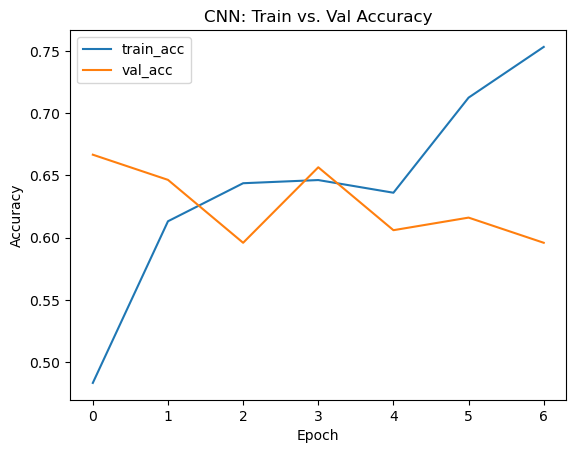

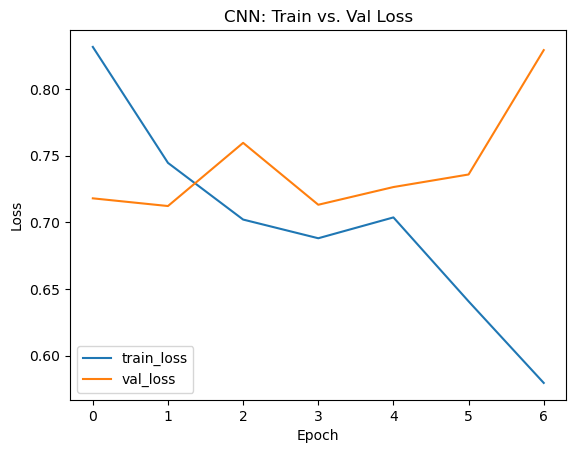

In [117]:
import matplotlib.pyplot as plt

# Plot train vs. val accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN: Train vs. Val Accuracy')
plt.show()

# Plot train vs. val loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN: Train vs. Val Loss')
plt.show()
